In [0]:
import pandas as pd
red = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep = ";")
white = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep = ";")

red['type'] = 0
white['type'] = 1

wine = pd.concat([red, white])

In [2]:
# 예제 5.12 : 품질 데이터 확인
print(wine['quality'].describe())
print(wine['quality'].value_counts())

count    6497.000000
mean        5.818378
std         0.873255
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64


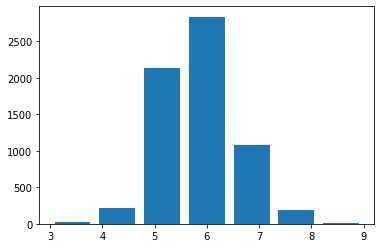

In [3]:
# 예제 5.13 : 품질 히스토그램 시각화
import matplotlib.pyplot as plt
plt.hist(wine['quality'], bins = 7, rwidth = 0.8)
plt.show()

In [5]:
# 예제 5.14 : 품질을 3개의 범주 (좋음, 보통, 나쁨) 로 재분류
wine.loc[wine['quality'] <= 5, 'new_quality'] = 0
wine.loc[wine['quality'] == 6, 'new_quality'] = 1
wine.loc[wine['quality'] >= 7, 'new_quality'] = 2

print(wine['new_quality'].describe())
print(wine['new_quality'].value_counts())

count    6497.000000
mean        0.829614
std         0.731124
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: new_quality, dtype: float64
1.0    2836
0.0    2384
2.0    1277
Name: new_quality, dtype: int64


In [7]:
data = [['Apple', 11], ['Banana', 23], ['Coconut', 35]]
df = pd.DataFrame(data, columns = ['Fruit', 'Count'])
print(df)
print()
print(df.loc[0])
print()
print(df.loc[0, 'Fruit'])

     Fruit  Count
0    Apple     11
1   Banana     23
2  Coconut     35

Fruit    Apple
Count       11
Name: 0, dtype: object

Apple


In [0]:
# 예제 5.15 : 데이터 정규화 및 훈련 데이터와 테스트 데이터 분리
import tensorflow as tf

# del wine['quality']
wine_norm = (wine - wine.min()) / (wine.max() - wine.min())
wine_shuffle = wine_norm.sample(frac = 1)
wine_np = wine_shuffle.to_numpy()

train_idx = int(len(wine_np) * 0.8)
train_X, train_Y = wine_np[: train_idx, : -1], wine_np[: train_idx, -1]
test_X, test_Y = wine_np[train_idx :, : -1], wine_np[train_idx : , -1]
train_Y = tf.keras.utils.to_categorical(train_Y, num_classes = 3)
test_Y = tf.keras.utils.to_categorical(test_Y, num_classes = 3)

In [0]:
# 예제 5.16 : 와인 데이터세트 다항 분류 모델 생성 및 학습

model = tf.keras.Sequential([
                             tf.keras.layers.Dense(units = 48, activation = 'relu', input_shape = (12, )),
                             tf.keras.layers.Dense(units = 24, activation = 'relu'),
                             tf.keras.layers.Dense(units = 12, activation = 'relu'),
                             tf.keras.layers.Dense(units = 3, activation = 'softmax')
])

model.compile(optimizer = tf.keras.optimizers.Adam(lr = 0.07), loss = 'categorical_crossentropy', metrics = ['accuracy'])

history = model.fit(train_X, train_Y, epochs = 25, batch_size = 32, validation_split = 0.25)

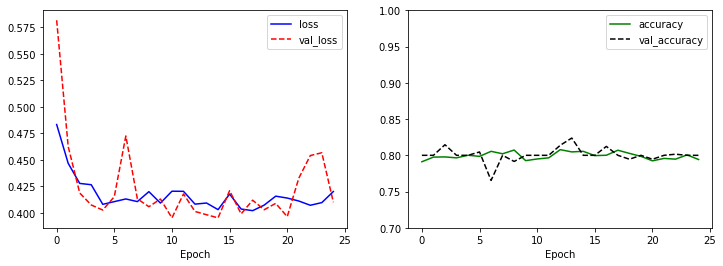

In [19]:
# 예제 5.17 : 다항 분류 모델 학습 결과 시각화
import matplotlib.pyplot as plt

plt.figure(figsize = (12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label = 'loss')
plt.plot(history.history['val_loss'], 'r--', label = 'val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label = 'accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

In [20]:
# 예제 5.18 : 다항 분류 모델 평가
model.evaluate(test_X, test_Y)

41/41 [==============================] - 0s 1ms/step - loss: 0.4220 - accuracy: 0.8215


[0.4219834804534912, 0.8215384483337402]